      0         1         2         3         4         5         6      \
0  0.439216  0.392157  0.525490  0.819608  0.686275  0.674510  0.850980   
1  0.172549  0.192157  0.105882  0.168627  0.188235  0.101961  0.156863   
2  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4  0.949020  0.992157  1.000000  0.949020  0.996078  0.984314  0.952941   

      7         8         9      ...     29990     29991     29992     29993  \
0  0.823529  0.647059  0.847059  ...  0.450980  0.254902  0.360784  0.215686   
1  0.176471  0.090196  0.149020  ...  0.137255  0.137255  0.137255  0.137255   
2  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
3  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
4  1.000000  0.972549  0.960784  ...  0.847059  0.956863  0.917647  0.850980   

      29994     29995     29996     29997     29998     29999  
0  0

/Users/yuss/Documents/cours_m2/machineLearning/tp3/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/g0/24ly75kd2s5dsc033x_mqkp40000gp/T/ipykernel_43783/829319203.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  img = Image.fromarray((img * 255).astype(np.uint8))
/var/folders/g0/24ly75kd2s5dsc033x_mqkp40000gp/T/ipykernel_43783/829319203.py:146: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Inertia: 487739.6587164777
Davies Bouldin Score: 2.7169871878292637


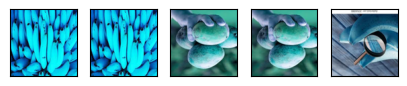

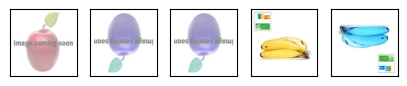

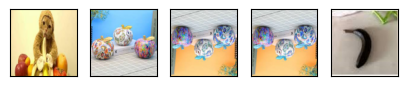

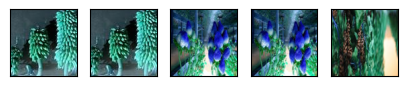

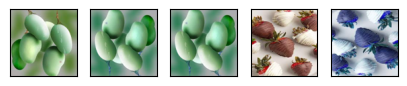

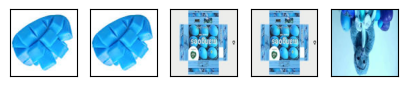

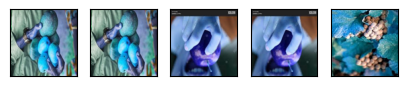

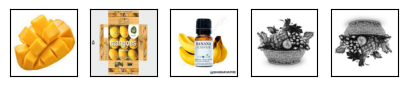

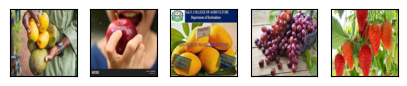

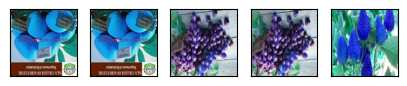

In [1]:
from PIL import Image, ImageOps, ImageEnhance
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from matplotlib import pyplot as plt
import random

IMAGE_SIZE = (64,64)
MAX_IMAGES = 100
NB_CLUSTERS = 10

# Fonction pour augmenter les images
def augment_image(img):
    res = []
    res.append(img)

    # Convertir la matrice en image
    img_pil = Image.fromarray((img * 255).astype(np.uint8))

    # Miroir vertical
    transformed = ImageOps.flip(img_pil)
    res.append(np.array(transformed) / 255.0)

    # Rotation de 180°
    transformed = img_pil.rotate(180)
    res.append(np.array(transformed) / 255.0)

    """  # Rotation aléatoire entre -45 et 45 degrés
    random_angle = random.randint(-45, 45)
    transformed = img_pil.rotate(random_angle)
    res.append(np.array(transformed) / 255.0)
    
    # Changement d'échelle aléatoire entre 0.8 et 1.2
    random_scale = random.uniform(0.8, 1.2)
    new_width = max(1, int(img_pil.width * random_scale))
    new_height = max(1, int(img_pil.height * random_scale))
    transformed = img_pil.resize((new_width, new_height))
    res.append(np.array(transformed) / 255.0)

    
    # Recadrage aléatoire
    left_max = max(0, img_pil.width - 50)
    top_max = max(0, img_pil.height - 50)
    left = random.randint(0, left_max)
    top = random.randint(0, top_max)
    right_max = min(img_pil.width, left + 50)  # Correction ici
    right = random.randint(left + 1, right_max)  # Modification ici
    bottom_max = min(img_pil.height, top + 50)  # Correction ici
    bottom = random.randint(top + 1, bottom_max)  # Modification ici
    transformed = img_pil.crop((left, top, right, bottom))
    res.append(np.array(transformed) / 255.0) """

    """  # Changement de luminosité aléatoire
    enhancer = ImageEnhance.Brightness(img_pil)
    random_brightness = random.uniform(0.5, 1.5)
    transformed = enhancer.enhance(random_brightness)
    res.append(np.array(transformed) / 255.0) """

    return res

# Fonction pour charger les images
def load_images_into_array(folder_path, max_images=100, image_size=(100, 100)):
    images = []
    i = 0
    for filename in os.listdir(folder_path):
        if(i >= max_images):
            break

        file_path = os.path.join(folder_path, filename)
        
        try:
            # Charger l'image et la redimensionner
            img = Image.open(file_path).convert('RGB')
            img = img.resize(image_size)
            # normaliser les valeurs de pixels de 0 à 1 au lieu de 0 à 255
            img = np.array(img).astype('float32') / 255
            img_array = np.array(img)
            # Ajouter l'image à la liste
            images.append(img_array.flatten())
        except Exception as e:
            print(f"Erreur lors du traitement de l'image {file_path}: {str(e)}")
            print(e)
        
        i += 1

    return images

# Spécifiez le chemin du dossier contenant vos images
dataset_folder_path = "./fruits/"

# Chargez les images dans un format adapté à scikit-learn
images = load_images_into_array(dataset_folder_path, max_images=MAX_IMAGES, image_size=(100, 100))

# Créez un DataFrame pandas avec les données
df = pd.DataFrame(data=images)

# Affichez les premières lignes du DataFrame
print(df.head())

# Appliquez des techniques d'augmentation de données
augmented_images = []
i = 0
for img in images:
    augmented_images.extend(augment_image(img))

# Créez un DataFrame pour les images augmentées
augmented_df = pd.DataFrame(data=augmented_images)

# Remplacez les valeurs NaN par 0
augmented_df.fillna(0, inplace=True)


# print len of augmented_df
print(len(augmented_df))


# Appliquez l'algorithme K-Means sur les images prétraitées et augmentées
# pour regrouper les fruits en clusters. Choisissez un nombre de clusters K
# approprié. Vous pouvez expérimenter avec différentes valeurs de K

# Créez un objet K-Means avec 3 clusters
kmeans = KMeans(n_clusters=NB_CLUSTERS, random_state=0)

# Appliquez K-Means sur les données prétraitées
kmeans.fit(augmented_df)

# Visualisation des clusters
columns = 5
rows = NB_CLUSTERS
for i in range(0, rows):
    fig = plt.figure(figsize=(5, 20))
    errors = 0
    for j in range(0, columns):
        try:
            img = augmented_df.iloc[kmeans.labels_ == i].values[j]
            img = img.reshape((100, 100, 3))
            img = Image.fromarray((img * 255).astype(np.uint8))
            fig.add_subplot(rows, columns, (i * columns) + j + 1, xticks=[], yticks=[])
            plt.imshow(img)
        except:
            print("No more image in cluster " + str(i))
            errors += 1
    if(errors < 3):
        fig.show()

# Évaluation de la classification
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

# Évaluation davies_bouldin_score
davies_bouldin = davies_bouldin_score(augmented_df, kmeans.labels_)
print(f"Davies Bouldin Score: {davies_bouldin}")
